# NDBC data

Download data from National Data Buoy Center (NDBC) https://www.ndbc.noaa.gov/obs.shtml 

This notebook requires package NDBC to run
* https://pypi.org/project/NDBC/ - [Documentation](https://supermanzer.github.io/NDBC/html/index.html)

In [1]:
# !pip install NDBC

In [2]:
import os
from NDBC.NDBC import DataBuoy
import pandas as pd


Define buoy

In [3]:
DB = DataBuoy()
buoy_id='41041'
DB.set_station_id(buoy_id)

iterate over years and get data

In [4]:
i=0
for year in range(2016,2023,1):
    try:
        DB.get_data(datetime_index=True,years=[year]) 
    except:
#         corrupted data
        pass
    try:
        df_aux=DB.data['stdmet']['data']
        
    except:
        continue
    
    if i==0:
        df=df_aux.copy()
    else:
        df=pd.concat([df,df_aux],axis=0)
        i=i+1

# remove overlaps
df = df.loc[~df.index.duplicated(keep='first')]

c:\Users\jem\AppData\Local\mambaforge\lib\site-packages\NDBC\NDBC.py:364: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(url, sep=r"\s+")
c:\Users\jem\AppData\Local\mambaforge\lib\site-packages\NDBC\NDBC.py:364: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(url, sep=r"\s+")
Year 2020 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 2022 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041


Get Hm0 and Tp only

<AxesSubplot: >

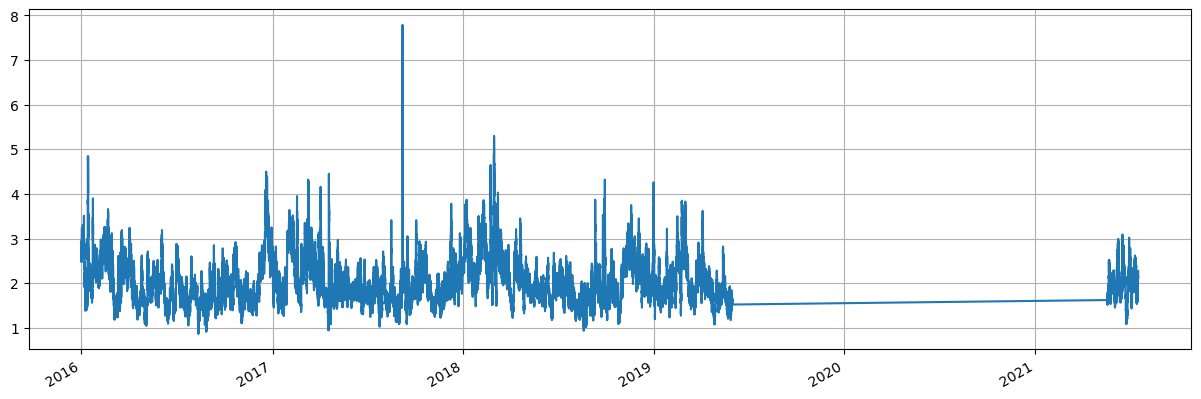

In [5]:
df=df[['WVHT','DPD']]  # Hm0 and Tp
# remove small  Hm0
df=df[df['WVHT']>0.15]
# plot Hm0 to check
df['WVHT'].plot(figsize=(15,5),grid=True);